Retrieving file
Countries:  ['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belarus', 'Belgium', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Cambodia', 'Cameroon', 'Canada', 'Chile', 'China', 'Colombia', 'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cruise Ship', 'Cyprus', 'Czechia', 'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'Estonia', 'Finland', 'France', 'French Guiana', 'Georgia', 'Germany', 'Greece', 'Holy See', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Korea, South', 'Kuwait', 'Latvia', 'Lebanon', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malaysia', 'Maldives', 'Malta', 'Martinique', 'Mexico', 'Moldova', 'Monaco', 'Mongolia', 'Morocco', 'Nepal', 'Netherlands', 'New Zealand', 'Nigeria', 'North Macedonia', 'Norway', 'Oman', 

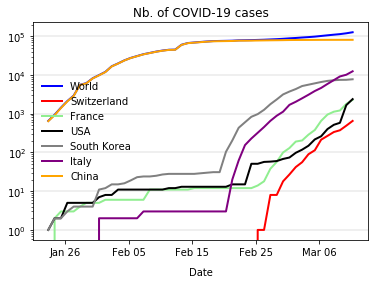

In [1]:
##!/usr/bin/env python

# Any copyright is dedicated to the Public Domain.
# https://creativecommons.org/publicdomain/zero/1.0/

# Written by Francois Fleuret <francois@fleuret.org>

import os, time
import numpy, csv
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import urllib.request

url = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'

file = url[url.rfind('/')+1:]

######################################################################

if not os.path.isfile(file) or os.path.getmtime(file) < time.time() - 86400:
    print('Retrieving file')
    urllib.request.urlretrieve(url, file)

######################################################################

with open(file, newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    times = []
    nb_cases = {}
    time_col = 5
    for row_nb, row in enumerate(reader):
        for col_nb, field in enumerate(row):
            if row_nb >= 1 and col_nb == 1:
                country = field
                if not country in nb_cases:
                    nb_cases[country] = numpy.zeros(len(times))
            if row_nb == 0 and col_nb >= time_col:
                times.append(time.mktime(time.strptime(field, '%m/%d/%y')))
            if row_nb >= 1:
                if col_nb >= time_col:
                    nb_cases[country][col_nb - time_col] += int(field)

countries = list(nb_cases.keys())
countries.sort()
print('Countries: ', countries)

nb_cases['World'] = sum(nb_cases.values())

######################################################################

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.yaxis.grid(color='gray', linestyle='-', linewidth=0.25)
ax.set_title('Nb. of COVID-19 cases')
ax.set_xlabel('Date', labelpad = 10)
ax.set_yscale('log')

myFmt = mdates.DateFormatter('%b %d')

ax.xaxis.set_major_formatter(myFmt)
dates = mdates.epoch2num(times)

for key, color, label in [
        ('World', 'blue', 'World'),
        ('Switzerland', 'red', 'Switzerland'),
        ('France', 'lightgreen', 'France'),
        ('US', 'black', 'USA'),
        ('Korea, South', 'gray', 'South Korea'),
        ('Italy', 'purple', 'Italy'),
        ('China', 'orange', 'China')
]:
    ax.plot(dates, nb_cases[key], color = color, label = label, linewidth=2)

ax.legend(frameon = False)

plt.show()

fig.savefig('covid19.png')

######################################################################
